# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Task:

Given a dataset of used cars with their prices and features, we wish to identify and extract the features that correlate the strongest with sales price. This would involve training accurate models to predict sales prices, choosing the best one, and identifying which features were the most significant factors in the model. Once we discover these features, we need to create a final report on the features and explain how impactful each one is on sales price and why.

## Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Things to do:

1) Look through the dataset and get a general gist of the dataset. For example, getting the total length of the dataset, seeing how many columns there are, what the column types are, and the range/unique values for each column
2) Find any NULL values or typos or errors in the dataset and decide on how to proceed with the data (whether to drop it or replace it with something)
3) Also note any unnecessary columns that don't have much impact, i.e. a column with a single unique value
4) Since we're also probably gonna use Linear Regression to train models, we also need to keep track of potential features to use/remove/transform.

In [397]:
# Import the necessary libraries for retrieving the data
import numpy as np
import plotly.express as px
import seaborn as sns
import pandas as pd

In [2]:
# Load in the dataframe
cars = pd.read_csv( "data/vehicles.csv" )

In [3]:
# Look at the info of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
# See what the data looks like
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Examining NaN Values

In [5]:
# By how there are a bunch of NaN, check how many Nan's are in the dataset
cars.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [7]:
# See how many rows without any NaN's there are
print( "Total rows:", len( cars ) )
print( "Non-NaN rows:", len( cars.dropna() ) )
print( "Difference:", len( cars ) - len( cars.dropna() ) )

Total rows: 426880
Non-NaN rows: 34868
Difference: 392012


Yikes, that's a lot of rows with NaN. To reduce the amount of dropped rows, dropping some columns would probably be useful. So let's look at some of the columns

In [189]:
# See actual examples of the data
cars.dropna().head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


In [8]:
# See how many unique values are in the dataset
cars.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

One note is that "VIN" is probably too specific, so we can drop it. Same logic applied to "model". If we were to transform it with One-Hot encoding, we would end up with 29649 additional columns, which would bloat the data. In addition, we should drop "id" since it's more of an identifier than a feature of the data. We can also drop "size" since it contains the most NaN values while also being a bit specific and not very important. Features such as type can easily represent "size" pretty well, so it's not needed. Lastly, we wish to know the general trend of cars rather than trends based on geographic region, so we can drop the "state" and "region" columns as well. This also helps reduce the number of unique features in the dataset.

### Finding Outliers

In [406]:
# Lets look at the price and see if there are any outliers
print( min( cars["price"] ), max( cars["price"] ))

# We can't even plot it since the max is so big
#sns.histplot( cars["price"] )

0 3736928711


In [393]:
# There definitely are outliers in price. So lets limit the data.
print( "Price > 150k:", len( cars[cars["price"] > 150000] ) )

# In addition, used cars with a price of zero doesn't make much sense, so we'll probably remove these as well
print( "Price == 0:", len( cars[cars["price"] == 0] ) )

Price > 150k: 196
Price == 0: 32895


Text(0.5, 1.0, 'Histogram of Sales Price without outliers')

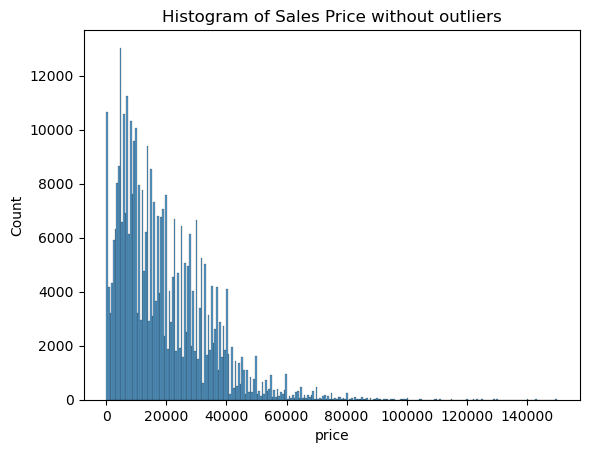

In [413]:
# With the outliers gone, the data looks a lot better
sns.histplot( cars[(cars["price"] > 0) & (cars["price"] < 150000)]["price"] )
plt.title( "Histogram of Sales Price without outliers" )

Most prices are between 0 - 100000, so we can remove the outliers above the range or equal to zero when prepping the data.

Text(0.5, 1.0, 'Histogram of all odometer data')

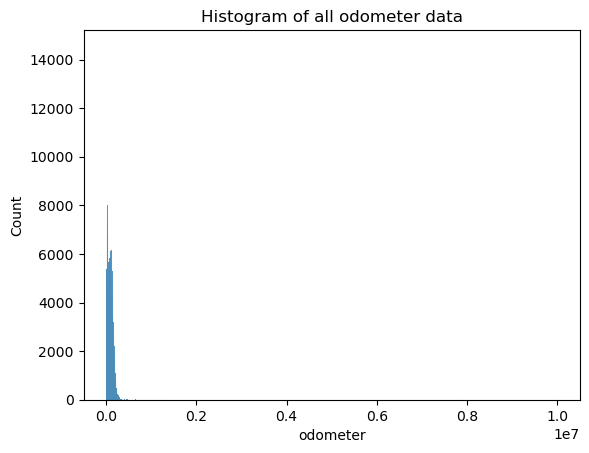

In [414]:
# Lets also look at odometer for outliers
sns.histplot( cars["odometer"] )
plt.title( "Histogram of all odometer data" )

In [100]:
# There definitely are outliers in odometer. So lets limit the data.
print( "Odometer > 200k:", len( cars[cars["price"] > 200000] ) )

Odometer > 200k: 124


Text(0.5, 1.0, 'Histogram of odometer without outliers')

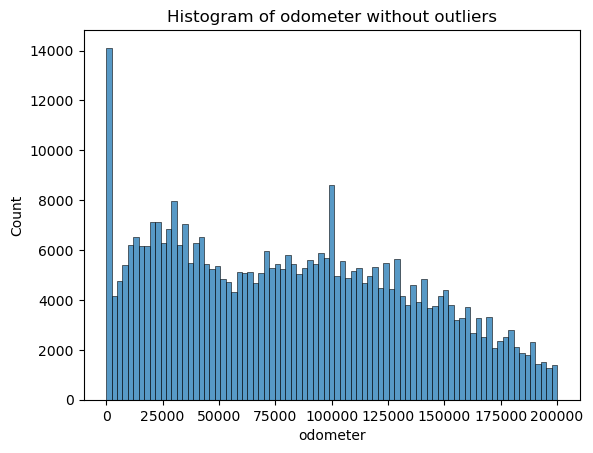

In [415]:
# With the outliers gone, the data looks a lot better
sns.histplot( cars[cars["odometer"] < 200000]["odometer"] )
plt.title( "Histogram of odometer without outliers")

After removing the outliers, we have an odometer range of 0 - 200k.

### Feature Analysis

Now lets look at some of the features and see if any need to be transformed. Most of the features are string objects, so we'll probably need to use one-hot encoding for them.

#### Year

In [31]:
# Looking at year to see how it looks
cars["year"].unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

Looking at the "year" feature, it seems better to convert year to a categorical feature rather than a numerical feature.

#### Condition

In [33]:
# Lets look at condition
cars["condition"].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

Text(0.5, 1.0, 'Counts of each unique value in condition')

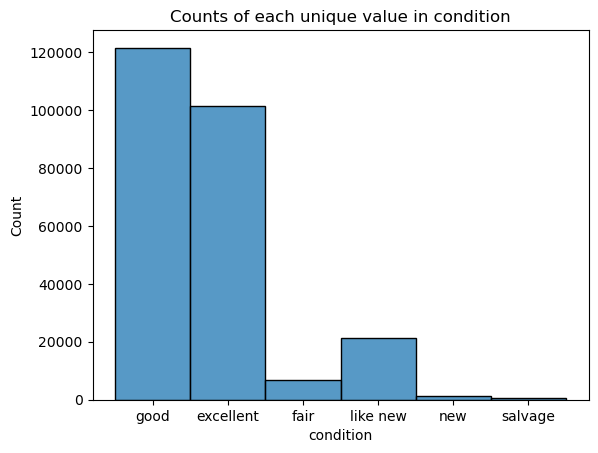

In [417]:
# This seems like a feature to use ordinal scaling for, but lets see the distribution
sns.histplot( cars["condition"] )
plt.title( "Counts of each unique value in condition" )

It seems like condition is fairly ordinal, so we can set it to this scale order:

1) Salvage
2) Fair
3) Good
4) Excellent
5) Like New
6) New

I'm assuming having the car as new is the best possible condition possible

#### Cylinders

In [35]:
# Looking at cylinders to see if it can be converted to numerical
cars["cylinders"].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

Though "Cylinders" can be converted to numerical numbers, it's better to leave it as categorical to save the "other" datapoint. In addition, the amount of unique values is pretty low to convert it to numerical

#### Title Status

In [191]:
# Lastly, looking at title_status
print( cars["title_status"].unique() )
print( cars[["title_status"]].value_counts() )

[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
title_status
clean           405117
rebuilt           7219
salvage           3868
lien              1422
missing            814
parts only         198
Name: count, dtype: int64


We don't really want to analyze used cars that are missing, just parts, or salvage, so it's probably better to just remove those two unique values for title_status

### Initial Findings of data

* It seems like the dataset is missing a lot of data, with specific features such as **cylinders** and **condition** missing in more than 100000 rows. When we remove all rows containing NaN, we go from 426880 rows to a measly 34848 rows, which is less than 10% of the original data. We can slightly counteract this by removing features to reduce the number of rows removed. Full list below:
    * **VIN**: Too specific and missing too many values.
    * **id**: Simply an identification number, nothing to gain
    * **model**: Too many unique values and missing values. In addition, manufacturer can represent model pretty well
    * **region**: We want general trends rather than geographical trends
    * **state**: same as above for region
    * **title_status(missing/salvage parts)**: We want to just deal with used cars
    * **size**: missing the most, with it being NaN in 75% of the data. In addition it can be represented with type pretty well.

* Most of the features are categorical with only **odometer** being a numerical feature. This would entail having to use one-hot encoding to transform the categorical features into compatible features for regression models. A problem is that this bloats the data extremely, so prior feature pruning might be required to reduce the complexity of the dataset.
    * An exception is **condition**, which is an ordinal feature rather than a categorical one. The scale was explained in its own section
    * For **Year**, it is considered more as a categorical feature rather than a numerical feature, so it will have to be converted.

* The target feature, **price**, has some outliers. There are only a few above 200000, which can be removed. In addition, used cars with a sale price of $0 doesn't really make sense, so we can remove those as well.

* Additionally, the feature **odometer** also has a few outliers that should be pruned as well

## Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [261]:
# First remove the unnecessary features from the data
filteredColumns = cars.drop( ["id","VIN","model","size","region","state","size"], axis = 1 )
filteredColumns.info()
filteredColumns.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
 11  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


price            15655
year               114
manufacturer        42
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
drive                3
type                13
paint_color         12
dtype: int64

In [210]:
# Filter out the "parts only", "missing", "salvage" from title_status
removedValues = ["parts only", "missing", "salvage"]
filteredColumns = filteredColumns.query( "title_status not in @removedValues" )
filteredColumns["title_status"].unique()

array([nan, 'clean', 'rebuilt', 'lien'], dtype=object)

In [212]:
# Then we filter out the outliers
noOutliers = filteredColumns.query( "odometer < 200000 and price > 0 and price < 150000" )
len( noOutliers )

363321

In [214]:
# Finally, we remove any NaN from the data
cleanCars = pd.DataFrame( noOutliers.dropna() )
len( cleanCars ) # We keep around 25% of the original filtered data, which is pretty bad, but not as bad as before

102029

In [215]:
# With the data, we need to convert year into a categorical object
cleanCars["year"] = cleanCars["year"].astype( 'int64' ).astype( 'category' )
cleanCars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102029 entries, 31 to 426878
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         102029 non-null  int64   
 1   year          102029 non-null  category
 2   manufacturer  102029 non-null  object  
 3   condition     102029 non-null  object  
 4   cylinders     102029 non-null  object  
 5   fuel          102029 non-null  object  
 6   odometer      102029 non-null  float64 
 7   title_status  102029 non-null  object  
 8   transmission  102029 non-null  object  
 9   drive         102029 non-null  object  
 10  type          102029 non-null  object  
 11  paint_color   102029 non-null  object  
dtypes: category(1), float64(1), int64(1), object(9)
memory usage: 9.4+ MB


## Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [223]:
# Import all the sklearn libraries we need for modeling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error

### Preparations for Model Training

We first get out training and testing set from the data

In [217]:
# We split the data into training and testing data
X, y = cleanCars.drop( "price", axis = 1 ), cleanCars["price"]
X_train, X_test, y_train, y_test = train_test_split( X, y )
print( "Len of Training Data:", len( X_train ) )
print( "Len of Test Data:", len( X_test ) )

Len of Training Data: 76521
Len of Test Data: 25508


To reduce repetitive code, we'll create the preprocess transformation pipelines here since the process will remain the same throughout models

In [240]:
# Numeric transformer for odometer (poly + scaler)
numeric_transformer = Pipeline([
    ( "poly", PolynomialFeatures( include_bias = False ) ),
    ( "scaler", StandardScaler())
])

# OHE for most columns
ohe = OneHotEncoder( handle_unknown = "ignore" )

# Ordinal transformer for condition
oe = OrdinalEncoder( categories = [["salvage","fair","good","excellent","like new","new"]] )

# Put everything together into a preprocessor object
preprocessor = ColumnTransformer([
    ( "ordinal", oe, ["condition"] ),
    ( "numeric", numeric_transformer, ["odometer"] ),
    ( "ohe", ohe, make_column_selector( "^(?!condition$)", dtype_include=["object", "category"] ) )
])

In [422]:
# Test out the preprocessor and see if the results are correct:
# First val should be ordinal, second and third should be scaled numerical, and everything else should be 0 or 1
preprocessor.fit_transform( X_train ).todense()

matrix([[ 2.        ,  1.25300368,  1.36587457, ...,  0.        ,
          0.        ,  0.        ],
        [ 2.        ,  0.15020289, -0.11690417, ...,  0.        ,
          0.        ,  0.        ],
        [ 3.        ,  0.94924365,  0.89231764, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 2.        ,  1.06315366,  1.06409809, ...,  0.        ,
          1.        ,  0.        ],
        [ 3.        , -0.66899994, -0.79584158, ...,  0.        ,
          1.        ,  0.        ],
        [ 3.        , -0.14286858, -0.40117414, ...,  0.        ,
          1.        ,  0.        ]])

### Linear Regression Model
We try to create a linear regression model with all the data first.

In [430]:
# We do a simple preprocess + linear regression pipeline
linregPipe = Pipeline([
    ( "preprocess", preprocessor ),
    ( "linreg", LinearRegression() )
])

# We do a grid search for the degree for poly
linRegGrid = GridSearchCV( estimator = linregPipe, param_grid = {"preprocess__numeric__poly__degree": [1,2,3,4,5,6,7,8,9,10]}, scoring = "neg_mean_squared_error", n_jobs = -1 )
linRegGrid.fit( X_train, y_train )

# The printed model pipeline doesn't render well on github, so printing here to avoid that
print()

In [256]:
# See what the best degree given was
print( linRegGrid.best_params_ )

{'preprocess__numeric__poly__degree': 7}


Seems like the best degree was 7, which is pretty high

Now we test the model and see how well it performs on the test set and training set. For all the models, I will be comparing their error using mean squared error, as it is a good comparison for models. In addition, I will use root mean squared error to get a more grounded error to explain how much money was the general prediction off by.

In [434]:
# See how the model performed
bestLinReg = linRegGrid.best_estimator_
linreg_train_mse = mean_squared_error( bestLinReg.predict( X_train ), y_train )
linreg_test_mse = mean_squared_error( bestLinReg.predict( X_test ), y_test )
print( "Train MSE:", linreg_train_mse )
print( "Test MSE :", linreg_test_mse )

# We see RMSE as well so that we get a better view on how inaccurate the model is
print( "Test RMSE:", np.sqrt( linreg_test_mse ) )

Train MSE: 52259097.62602087
Test MSE : 51722265.320754744
Test RMSE: 7191.819333155884


From the results, we see that the error is decent, with model's predictions being different by around $7191

### Ridge Model
Now we try to use regularization to see if the model improves

In [431]:
# This time, we use Ridge instead of LinearRegression to see if regularization will help.
ridgePipe = Pipeline([
    ( "preprocess", preprocessor ),
    ( "ridge", Ridge() )
])

# We do a grid search for the degree for poly as well as the alpha for the ridge model
ridgeGrid = GridSearchCV( estimator = ridgePipe, param_grid = {"preprocess__numeric__poly__degree": [7,8,9,10], "ridge__alpha": 10**np.linspace(-5,4,15)}, scoring = "neg_mean_squared_error",n_jobs  = -1 )
ridgeGrid.fit( X_train, y_train )

# The printed model pipeline doesn't render well on github, so printing here to avoid that
print()

In [267]:
# What were the best params?
ridgeGrid.best_params_

{'preprocess__numeric__poly__degree': 9, 'ridge__alpha': 0.0037275937203149418}

Interestingly, the alpha is very small, meaning there isn't much impact in constraining the features.

Now we look through the MSE of the model to see how they compare to the other model.

In [435]:
# See how the model performed
bestRidge = ridgeGrid.best_estimator_
ridge_train_mse = mean_squared_error( bestRidge.predict( X_train ), y_train )
ridge_test_mse = mean_squared_error( bestRidge.predict( X_test ), y_test )
print( "Train MSE:", ridge_train_mse )
print( "Test MSE :", ridge_test_mse )

Train MSE: 52298964.35027943
Test MSE : 51801353.10853676


As we can see, the Ridge model did around the same as the normal LinReg model. With GridSearch, the best model was the one with very little to none constraining factor, which is very similar to the linear regression model.

### Sequential Feature Selection + Linear Regression Model
With our data having a large amount of features due to OHE, there is a risk of overfitting. So we can try using sequential feature selection to cut down on the # of features used and see if it generates a better model.

In [432]:
# We create the pipe, which does OHE, poly for odometer, then feature selection before linear regression
featureSelectPipe = Pipeline([
    ( "preprocess", preprocessor ),
    ( "featureSelection", SequentialFeatureSelector( LinearRegression(), scoring = "neg_mean_squared_error", n_features_to_select = 20, n_jobs = -1 ) ),
    ( "linreg", LinearRegression() )
])

# We do a grid search for the # of features to select
featureSelectPipe.fit( X_train, y_train )

# The printed model pipeline doesn't render well on github, so printing here to avoid that
print()

In [436]:
# See how the model performed
feature_train_mse = mean_squared_error( featureSelectPipe.predict( X_train ), y_train )
feature_test_mse = mean_squared_error( featureSelectPipe.predict( X_test ), y_test )
print( "Train MSE:", feature_train_mse )
print( "Test MSE :", feature_test_mse )

Train MSE: 62012620.1492042
Test MSE : 61380516.44288211


It seems like SequentialFeatureSelector takes the longest computational time due to the large amount of features in the processed data. As such, it's not viable to find a large enough subspace to find the most accurate model. However, we can see that the error is not very far from both the LinReg and Ridge models. If we were to continue expanding the number of features to select, it would be likely for the erro to continue to drop. Thus, analyzing the features it selected will be useful.

### Lasso Model
Lastly, we try out the Lasso Model.

In [438]:
# Prevent convergence warnings from Lasso
import warnings
warnings.filterwarnings("ignore")

# We create the pipe, which does OHE and poly for odometer
lassoPipe = Pipeline([
    ( "preprocess", preprocessor ),
    ( "lasso", Lasso() )
])

# We do a grid search for the degree for poly as well as the alpha for the ridge model
lassoGrid = GridSearchCV( estimator = lassoPipe, param_grid = {"preprocess__numeric__poly__degree":[7,8,9,10], "lasso__alpha": 10**np.linspace(-5,4,10)}, scoring = "neg_mean_squared_error", n_jobs = -1 )
lassoGrid.fit( X_train, y_train )

# The printed model pipeline doesn't render well on github, so printing here to avoid that
print()

In [275]:
lassoGrid.best_params_

{'lasso__alpha': 0.1, 'preprocess__numeric__poly__degree': 7}

In [437]:
# See how the model performed
bestLasso = lassoGrid.best_estimator_
lasso_train_mse = mean_squared_error( bestLasso.predict( X_train ), y_train )
lasso_test_mse = mean_squared_error( bestLasso.predict( X_test ), y_test )
print( "Train MSE:", lasso_train_mse )
print( "Test MSE :", lasso_test_mse )

Train MSE: 52497735.060361974
Test MSE : 51948546.7755336


With Lasso, we see that the MSE is similar to what LinReg and Ridge have as well. Since they all perform similarly, it's worth analyzing all of them to see which variables had the highest coefficients for each one.

### Results
After training LinReg, Ridge, SFS+LinReg, and Lasso models to predict sales price, we found that they all perform pretty similarly, with the LinReg model barely being the best performing model.

## Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Model Assessment

With all of our different linear models, lets compare them to see which one was the best model found utilizing their test RMSE. We utilize RMSE because we want to use this visual in our report and RMSE portrays an easier to understand error than MSE for the layman. In addition, RMSE is just the square root of MSE, so there's no difference between the models other than the scaling:

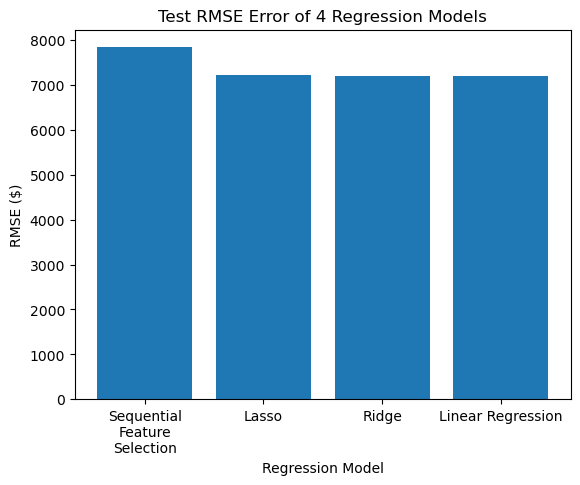

In [429]:
import matplotlib.pyplot as plt

# Grab all of the test errors of the models and visualize them
# We use RMSE to see the difference in price error
mse_list = {"Sequential\nFeature\nSelection": np.sqrt( feature_test_mse ),
            "Lasso": np.sqrt( lasso_test_mse ),
            "Ridge": np.sqrt( ridge_test_mse ),
            "Linear Regression": np.sqrt( linreg_test_mse )
             }

plt.ticklabel_format(style = 'plain')
plt.bar( mse_list.keys(), mse_list.values() )
plt.title( "Test RMSE Error of 4 Regression Models" )
plt.xlabel( "Regression Model" )
plt.ylabel( "RMSE ($)" )
plt.savefig( "images/testRMSE.png", bbox_inches='tight' )

As we can see, the error of the models are all pretty around the same barring SFS, which is a bit higher than the rest. Though this is mostly due to the extremely large computational time to have a decent subspace of the dataset. 

### Feature Analysis
These models all have pretty similar performance at predicting used car prices. Thus, instead of discarding all but the best model, it's better to look through each model to confirm which features they valued the most. To do this, we'll first use permutation_importance to see which features had the most impact in the models. Then, once we identified the most impactful features, we'll examine the coefficients in the linear regression model to see how exactly the features impact sales price.

In [331]:
# Find the importance means for the linear regression model
r = permutation_importance( bestLinReg, X_test, y_test, n_repeats = 30 )

# We want to record the importance means
importance_means = {}
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]:<20}"
           f"{r.importances_mean[i]:.3f}"
           f" +/- {r.importances_std[i]:.3f}")
    importance_means[X_test.columns[i]] = r.importances_mean[i]

year                0.452 +/- 0.005
odometer            0.125 +/- 0.001
cylinders           0.119 +/- 0.002
fuel                0.084 +/- 0.002
type                0.050 +/- 0.001
manufacturer        0.048 +/- 0.001
drive               0.019 +/- 0.001
title_status        0.006 +/- 0.000
transmission        0.004 +/- 0.000
condition           0.002 +/- 0.000
paint_color         0.001 +/- 0.000


In [332]:
# Find the importance means for the Ridge model
r = permutation_importance( bestRidge, X_test, y_test, n_repeats = 30 )
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]:<20}"
           f"{r.importances_mean[i]:.3f}"
           f" +/- {r.importances_std[i]:.3f}")
    importance_means[X_test.columns[i]] += r.importances_mean[i]

year                0.455 +/- 0.005
odometer            0.124 +/- 0.002
cylinders           0.119 +/- 0.002
fuel                0.084 +/- 0.001
type                0.050 +/- 0.001
manufacturer        0.048 +/- 0.001
drive               0.019 +/- 0.001
title_status        0.005 +/- 0.000
transmission        0.004 +/- 0.000
condition           0.002 +/- 0.000
paint_color         0.001 +/- 0.000


In [333]:
# Find the importance means for the Sequential Feature Selection + LinReg model
r = permutation_importance( featureSelectPipe, X_test, y_test, n_repeats = 30 )
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]:<20}"
           f"{r.importances_mean[i]:.3f}"
           f" +/- {r.importances_std[i]:.3f}")
    importance_means[X_test.columns[i]] += r.importances_mean[i]

year                0.385 +/- 0.004
cylinders           0.149 +/- 0.002
odometer            0.134 +/- 0.002
fuel                0.097 +/- 0.002
drive               0.047 +/- 0.001
manufacturer        0.022 +/- 0.001
transmission        0.008 +/- 0.000
paint_color         0.000 +/- 0.000
type                0.000 +/- 0.000
title_status        0.000 +/- 0.000
condition           0.000 +/- 0.000


In [334]:
# Find the importance means for the Lasso model
r = permutation_importance( bestLasso, X_test, y_test, n_repeats = 30 )
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]:<20}"
           f"{r.importances_mean[i]:.3f}"
           f" +/- {r.importances_std[i]:.3f}")
    importance_means[X_test.columns[i]] += r.importances_mean[i]

year                0.459 +/- 0.004
cylinders           0.119 +/- 0.002
odometer            0.117 +/- 0.002
fuel                0.084 +/- 0.001
type                0.050 +/- 0.001
manufacturer        0.048 +/- 0.001
drive               0.019 +/- 0.001
title_status        0.005 +/- 0.000
transmission        0.004 +/- 0.000
condition           0.002 +/- 0.000
paint_color         0.001 +/- 0.000


From a brief look over, it seems like **year, cylinders, odometer, and fuel** were always the top 5 features with the highest impact on sales price.

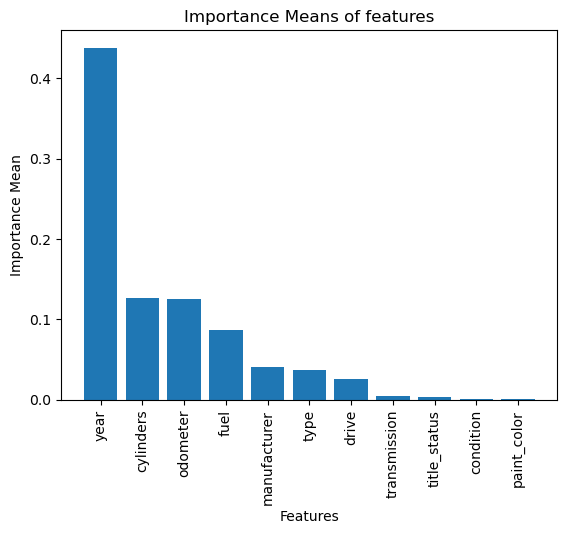

In [387]:
# Lets get the mean of the importance means and visualize how it looks
means = {}
for col in importance_means:
    means[col] = importance_means[col] / 4
means = dict(sorted(means.items(), key=lambda item: item[1], reverse = True))

plt.bar( means.keys(), means.values() )
plt.xticks( rotation = 90 )
plt.title( "Importance Means of features" )
plt.xlabel( "Features" )
plt.ylabel( "Importance Mean")
plt.savefig( "images/importanceMeans.jpg", bbox_inches='tight' )

From the permutation checks, we see that **year** has a lot more importance than many of the other features. An issue with this is that year has the most unique values to be one-hot encoded, meaning it has a lot more impactful features than others with only a few unique values. However, this is a good general view on how impactful each feature is on the models. Cutting out year, we see that **odometer, cylinders, fuel, type, manufacturer, and drive** all have decent impact on the model.

### Analyzing Coefficients

To know more about these features and how they reflect in the model, we'll need to look more in-depth at the coefficients to see what had the lowest/highest impact on the model. For this step, we'll use the best model we found (Linear regression) since it is the most accurate. Positive coefficients indicate a positive correlation with sales price, and vice versa for negative coefficients. So we'll need to examine both the min and max coefficients to get a better picture.

In [345]:
# Get the coefficients of the linear regression model and sort them
coefs = bestLinReg.named_steps["linreg"].coef_
colNames = bestLinReg.named_steps["preprocess"].get_feature_names_out()

coef_values = sorted( zip( coefs, colNames ), reverse = True )

# We print the largest 20 coefficients
for coef, col in coef_values[:20]:
    print( f"{col:<30} : {coef:.3f}" )

numeric__odometer^3            : 286768.495
numeric__odometer^6            : 206060.765
ohe__year_1913                 : 70237.453
ohe__manufacturer_ferrari      : 63677.648
ohe__manufacturer_aston-martin : 26235.100
ohe__year_2021                 : 24916.524
ohe__year_1900                 : 20409.260
ohe__manufacturer_tesla        : 18630.755
ohe__year_2020                 : 17239.170
numeric__odometer              : 14367.894
ohe__year_2019                 : 13417.270
ohe__year_1934                 : 12485.619
ohe__year_1928                 : 12295.930
ohe__year_1958                 : 11859.464
ohe__year_2018                 : 11497.807
ohe__year_1932                 : 11415.198
ohe__year_1957                 : 11302.938
ohe__year_2017                 : 10218.902
ohe__manufacturer_porsche      : 10193.234
ohe__year_1937                 : 10017.194


In [346]:
# We print the smallest 20 coefficients
for coef, col in coef_values[-20:]:
    print( f"{col:<30} : {coef:.3f}" )

ohe__year_1990                 : -8408.914
ohe__year_1982                 : -8511.559
ohe__year_1988                 : -8991.618
ohe__cylinders_3 cylinders     : -9013.338
ohe__year_1974                 : -9097.082
ohe__year_1986                 : -9205.809
ohe__year_1977                 : -9210.706
ohe__manufacturer_fiat         : -9292.329
ohe__year_1925                 : -9417.387
ohe__year_1981                 : -9732.658
ohe__year_1984                 : -9760.094
ohe__year_1979                 : -9768.557
ohe__year_1983                 : -9810.352
ohe__year_1952                 : -9968.931
ohe__year_1980                 : -10096.933
ohe__year_1926                 : -11343.873
numeric__odometer^5            : -63063.916
numeric__odometer^7            : -85203.750
numeric__odometer^2            : -122759.537
numeric__odometer^4            : -239271.598


Interestingly, the odometer has both the highest and lowest coefficients for the linear regression model. Thus, they kind of cancel each out. But from the permutation check, there was definitely some impact. Judging by how the bottom 4 coefficients are for odometer, I would say that the higher the odometer, the lower the sales price

Looking at year, we see that a lot have both minimum and maximum coefficients in the model. However, it seems like a lot of these years might not have enough data and thus might be overfitted. So lets look though the years:

In [363]:
# It seems like the amount of data before 1960 is really minimal, which explains why the coefficients are so large.
X_train["year"].value_counts()[50:].sum()

1105

It might be worth it to filter out the year and odometer and view the coefficients again. However, setting aside that point, we can see that cars released in recent years do increase the sales price, which makes sense.

Besides those two, we can see that the more pricey car manufacturers such as ferrari and tesla have high correlation with sales price.

To see the coefficients for other features, we filter out any "odometer" or "year" features from the coefficients

In [368]:
# Lets filter out year and odometer from the coefficient results
# We first print out the top 20 coefficients
i = 0
count = 0
while( count < 20 ):
    coef, col = coef_values[i]
    if( "year" not in col and "odometer" not in col ):
        count += 1
        print( f"{col:<30} : {coef:.3f}" )
    i += 1

ohe__manufacturer_ferrari      : 63677.648
ohe__manufacturer_aston-martin : 26235.100
ohe__manufacturer_tesla        : 18630.755
ohe__manufacturer_porsche      : 10193.234
ohe__fuel_diesel               : 9618.788
ohe__cylinders_12 cylinders    : 8379.213
ohe__manufacturer_land rover   : 7277.873
ohe__cylinders_8 cylinders     : 5373.896
ohe__type_convertible          : 2918.218
ohe__type_offroad              : 2886.053
ohe__type_truck                : 2555.034
ohe__type_other                : 2343.045
ohe__type_coupe                : 2093.246
ohe__manufacturer_rover        : 1721.590
ohe__title_status_lien         : 1452.543
ohe__drive_4wd                 : 1356.320
ohe__title_status_clean        : 1209.438
ohe__type_pickup               : 1200.617
ohe__cylinders_6 cylinders     : 1157.182
ohe__paint_color_orange        : 918.984


It seems like the sales price increases as the number of cylinders increases. Also, normal type of cars such as convertibles and trucks have a higher price. Interestingly, cars that use diesel fuel have a higher price, perhaps due to how diesel is said to be more efficient than gasoline. Last but not least, it's funny to see that orange paint has the highest coefficient. Perhaps this is due to luxury cars having more orange colored models?

In [369]:
# Lets filter out year and odometer from the coefficient results
# This time, we'll print the smallest 20 coefficients
i = -1
count = 0
while( count < 20 ):
    coef, col = coef_values[i]
    if( "year" not in col and "odometer" not in col ):
        count += 1
        print( f"{col:<30} : {coef:.3f}" )
    i -= 1

ohe__manufacturer_fiat         : -9292.329
ohe__cylinders_3 cylinders     : -9013.338
ohe__manufacturer_dodge        : -6367.811
ohe__manufacturer_mercury      : -6142.013
ohe__manufacturer_harley-davidson : -6020.912
ohe__manufacturer_nissan       : -5708.867
ohe__manufacturer_chrysler     : -5671.040
ohe__manufacturer_kia          : -5659.160
ohe__manufacturer_mitsubishi   : -5219.485
ohe__manufacturer_hyundai      : -5118.060
ohe__manufacturer_volkswagen   : -4793.683
ohe__manufacturer_ram          : -4351.274
ohe__manufacturer_ford         : -4238.389
ohe__manufacturer_mini         : -4186.381
ohe__manufacturer_infiniti     : -4079.557
ohe__manufacturer_buick        : -3783.526
ohe__manufacturer_chevrolet    : -3634.620
ohe__manufacturer_bmw          : -3366.302
ohe__manufacturer_cadillac     : -3353.938
ohe__manufacturer_subaru       : -3280.984


It's interesting how most of the negative coefficients are tied to the manufacturer. Perhaps this is to balance out the more expensive car manufacturers?

Overall, we can see that year and odometer overwelm the top and bottom coefficients of the model. One thing to test is if they oversaturated the model and see what would happen if we removed these components:

In [372]:
# Quick model training without "year" or "odometer"
noYearOdometer_train, noYearOdometer_test = X_train.drop( ["year","odometer"], axis = 1 ), X_test.drop( ["year","odometer"], axis = 1 )

pipe = Pipeline([
    ("preprocess", ColumnTransformer([
        ( "ordinal", oe, ["condition"] ),
        ( "ohe", ohe, make_column_selector( "^(?!condition$)", dtype_include=["object", "category"] ) )])),
    ("linreg", LinearRegression() )
])
pipe.fit( noYearOdometer_train, y_train )

# See how the model performed
noFeature_train_mse = mean_squared_error( pipe.predict( noYearOdometer_train ), y_train )
noFeature_test_mse = mean_squared_error( pipe.predict( noYearOdometer_test ), y_test )
print( "Train MSE:", noFeature_train_mse )
print( "Test MSE :", noFeature_test_mse )

Train MSE: 102549113.57146136
Test MSE : 101891390.64112647


From what we can see, without year or odometer, the linear regression model performed a lot poorly than before, which confirms the permutation findings. Thus, they are both pretty important in determining price.

## Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Report

Starting with a dataset of used car prices containing 426880 rows, most of the data are missing values while others had outliers that needed to be filtered out. In addition, features such as "id", "VIN", and "model" were removed from the dataset to maximize the amount of remaining data and remove unnecessary features. As a result, the main dataset was reduced to around 102029 rows, which is around 25% of the original dataset. Though reduced by such an amount, it still is a lot of data to conduct analysis on.

Utilizing multiple regression models such as Linear Regression and Ridge, I tried training the best model to predict used car sales prices. The models all shared similar error scores, with most having a mean error of around $\$$7200 and the worst at $8700:
![](images/testRMSE.png)

From these models, I analyzed which features were the most impactful in determining sales price:
![](images/importanceMeans.jpg)

As we can see, **year, cylinders, odometer, and fuel** all have impact with **year** being the standout feature. Besides these 4, we note that **manufacturer, type, and drive** also have impact, but not as much. Any other feature such as **paint_color** or **condition** had very little impact.

Now that we know which features are impactful, I looked for how they exactly affect sales price by analyzing the coefficients in the linear regression model. Here are the results that I found (ordered by how impactful they are):
* Used cars that were manufactured during recent years (2017-Present) will have a higher price than those that were released earlier. However, some antique cars that were manufactured way back in the past (1920's - 1950's) do have higher prices.
* The more cylinders a used car has, the higher the sales price. This is probably due to the car having higher performance.
* The price of used cars decreases as the odometer of the car increases. This is likely due to the customer having the perception of the car being too used.
* Used cars that utilize diesel fuel cost more than those that use regular gasoline, in all likelihood due to the view that diesel powered vehicles are more efficient than gasoline powered vehicles
* Used cars from expensive car brands such as Tesla or Ferrari will have higher prices because of their reputation. Cars with normal manufacturers such as Nissan will have a lower price.
* Used cars that are convertibles, trucks/utility vehicles, or luxury cars have higher prices compared to regular automobiles.
* Paint color, title_status, transmission, and condition do not have much impact on sales price

### Summary
To summarize, there are many factors that consumers use to increase/decrease a used car's value. These boil down to the used car's current reputational value, minimum usage, and performance. Factors such as paint color or condition have little to no impact on the price since these can be fixed easily. However, features such as the car's manufacturer or engine type are much more important because they define the used car and are usually immutable. This is demonstrated by the fact that the car's manufactured year is the strongest indicator for its price.

### Next Steps/Recommendations
When managing their inventory for a car dealership, car dealers should pay attention to these factors to ensure a good variety in their business, so there's a supply for whatever consumers demand. They can also use these observations to decide on what used cars to purchase for the best return of investment. In addition, these factors can help car dealers structure their advertisements/pitches, focusing on car features that are valuable to the consumers. Lastly, when doing business, it would help if car dealers can confirm or deny the correlation between these features and used car prices. If not, then we would probably need a larger dataset to conduct analysis on.

### Reflection
If I were to conduct this analysis again, I would have liked to have the whole 4 million dataset since I had to drop so many rows from the given dataset. In addition, I would probably try to use random forests since they seem more fitting to use for categorical variables. However, since we haven't gone through forests, I'm unsure if it's applicable to this problem. Besides that, I wish the dataset didn't have so many missing values. Though it would be interesting to try training with the whole dataset by imputing the missing values. However, with so many imputed values, the trained model might be completely off from the actual data.